# Importing the libraries and Dataset

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings#ignore warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
#importing the dataset
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [4]:
#info about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


Null values:0

Rows:3506

Columns:9

In [5]:
train.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [6]:
#missing values in train

train.isnull().sum()


ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [7]:
#missing values in test
test.isnull().sum()

ID                0
CONSOLE           0
YEAR              0
CATEGORY          0
PUBLISHER         0
RATING            0
CRITICS_POINTS    0
USER_POINTS       0
dtype: int64

# Data Visualization

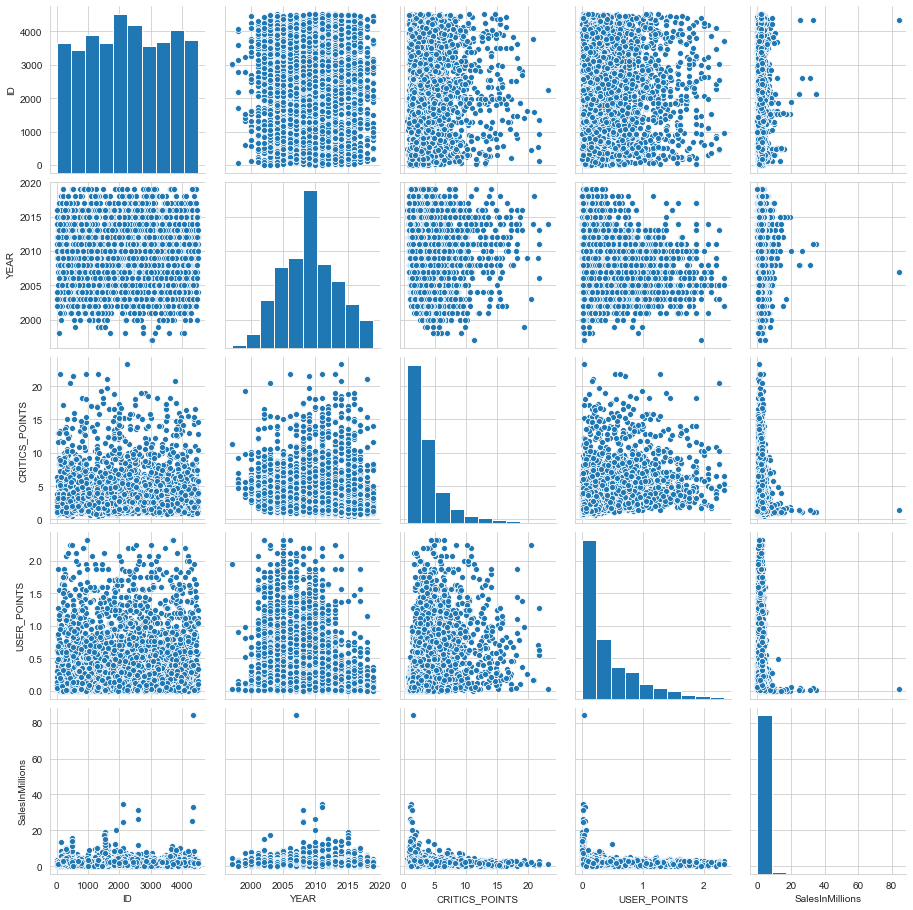

In [7]:
#multivariate data exploration
sns.pairplot(train)

In SalesInMillions there is only one point above 80 M and if see that example,the USER_POINTS is close to 0 which shows for such low points the sales can't be so high.

In [8]:
#outliers
train[train["SalesInMillions"]>80]
#Dropping this outlier

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
1036,4344,wii,2007,sports,Nintendo,E,1.490196,0.024691,84.226041


In [9]:
train=train[train["SalesInMillions"]<80]

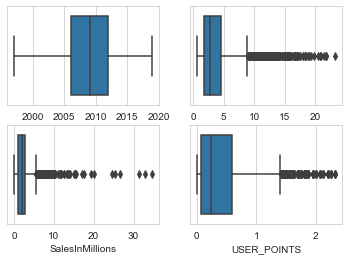

In [10]:
#checking outliers
fig,a=plt.subplots(2,2,)
sns.boxplot(train["YEAR"],ax=a[0][0])
sns.boxplot(train["CRITICS_POINTS"],ax=a[0][1])
sns.boxplot(train["USER_POINTS"],ax=a[1][1])
sns.boxplot(train["SalesInMillions"],ax=a[1][0])


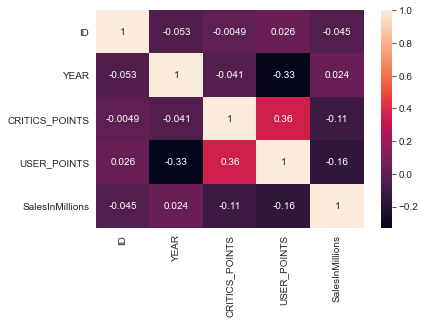

In [11]:
sns.heatmap(train.corr(),annot=True)

## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E667FD100>,
      dtype=object)

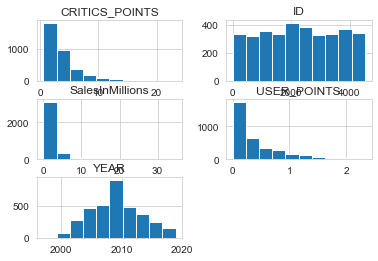

In [12]:
train.hist()

### The Console with the most SalesInMillions

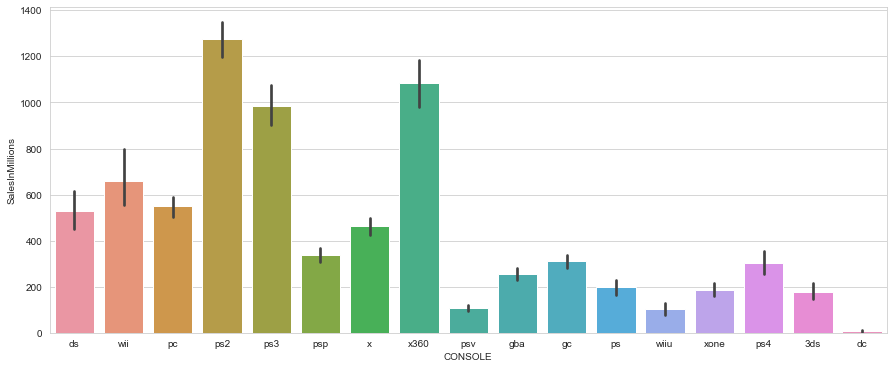

In [20]:
#console with salesin MillioNS
plt.figure(figsize=(15,6))
sns.barplot(x="CONSOLE",y="SalesInMillions",data=train,estimator=sum)


Top 3 consoles with highest Total SalesInMillions for the past 24 years: 

1) Ps2

2) x360

3) ps3

### Sales vs Year

In [21]:
cy=train.groupby(["CONSOLE","YEAR"]).sum()

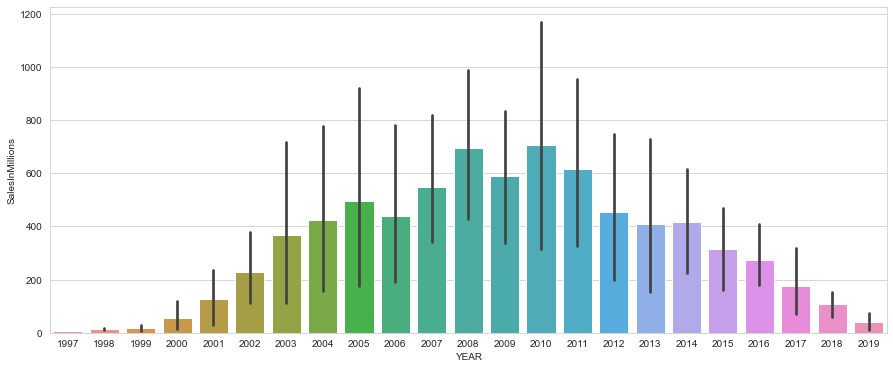

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(y="SalesInMillions",x=cy.index.get_level_values(1),data=cy,estimator=sum)

From the plot we can see that the Sales in gaming industry were at its peak in 2010 .

### The Console with highest Critics Point

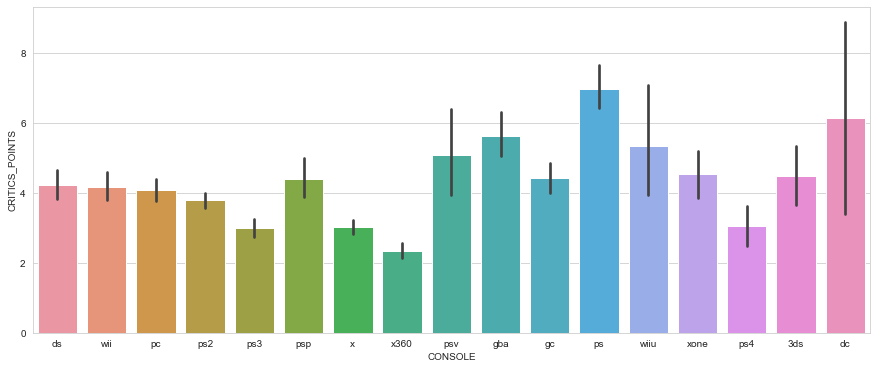

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x="CONSOLE",y="CRITICS_POINTS",data=train)

- According to the Critics,the best console is the PS while x360 recieved ratings from the Critics.This shows that the Critics were not satisfied by x360.

### The Console with highest User Point

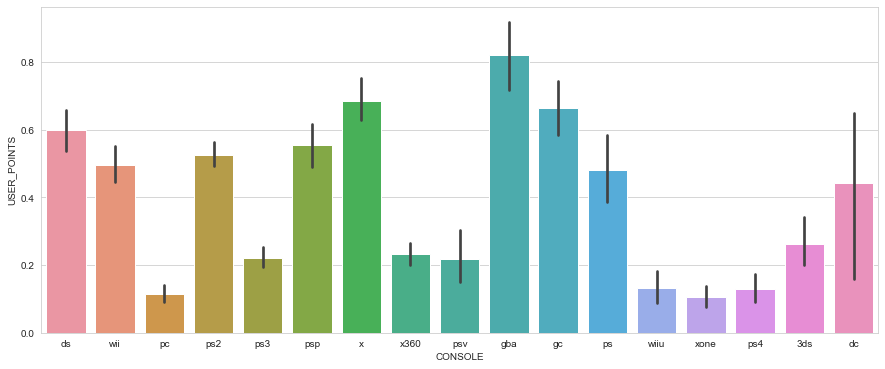

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(x="CONSOLE",y="USER_POINTS",data=train)

- According to the users,Gameboy Advance is the highest rated console while Xone was the least favourite among the users.
- PS which was the Critics favourite did not receive much ratings from the users.

### Rating vs Console

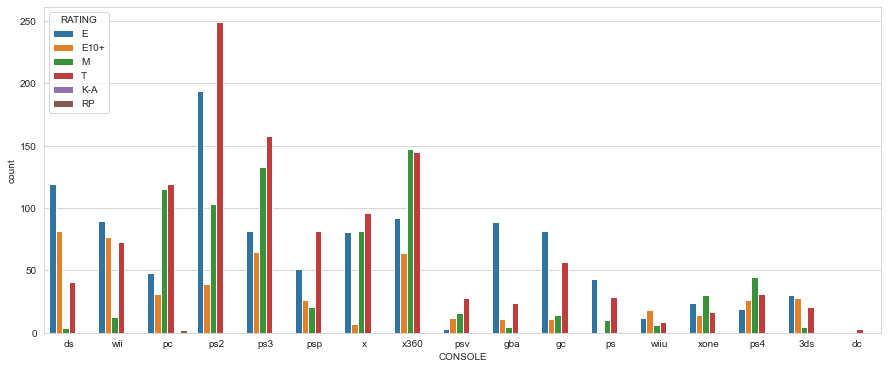

In [14]:
plt.figure(figsize=(15,6))
sns.countplot("CONSOLE",data=train,hue="RATING")

Majority of the consoles are rated as T(13 and above) or E(6 and above).

### Rating vs SalesInMillions

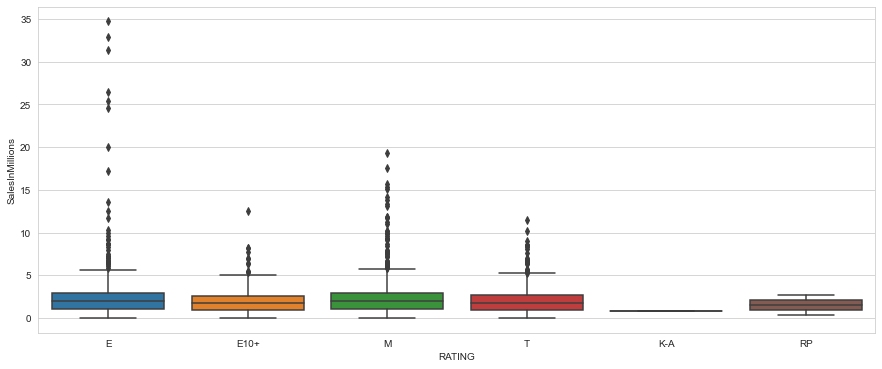

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x="RATING",y="SalesInMillions",data=train)

According to this plot, the median for all rating is around 2.5 which shows that Ratings does not play an important role in predicting Sales.

### Which year were most of the games Published?

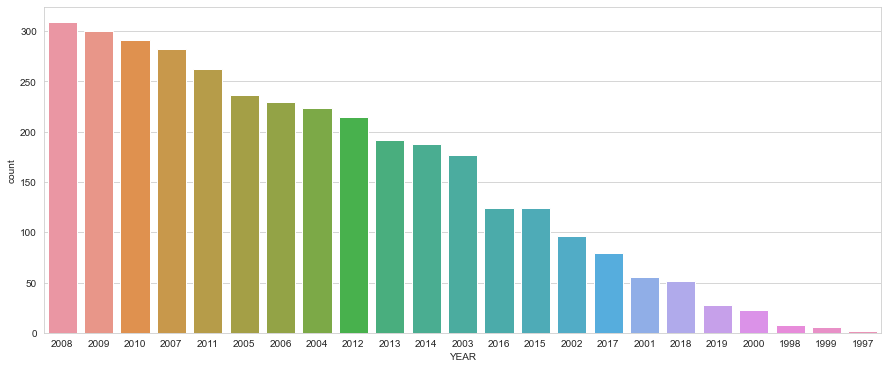

In [11]:
#year with max games
plt.figure(figsize=(15,6))
sns.countplot(train["YEAR"],order=train["YEAR"].value_counts().index)


Most the publications were made from 2008 -2010 .

### Top 5 years

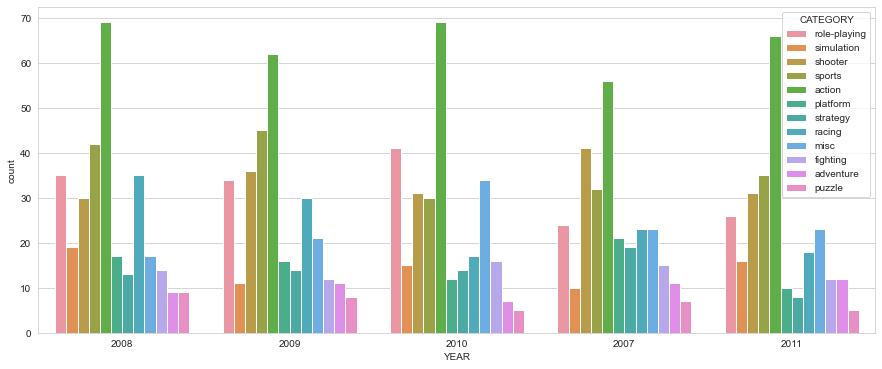

In [12]:

plt.figure(figsize=(15,6))
sns.countplot(train["YEAR"],order=train["YEAR"].value_counts().head(5).index,hue=train["CATEGORY"])
#top 5 years most made category is action

### Last 5 years

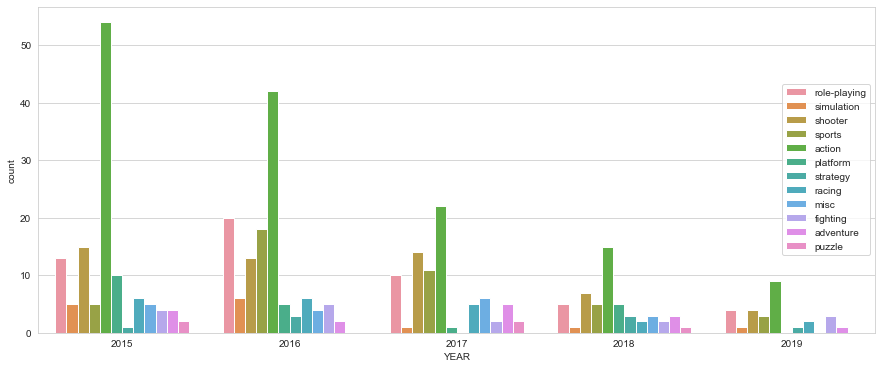

In [13]:
#recent 5 years
plt.figure(figsize=(15,6))
sns.countplot(train["YEAR"],order=train["YEAR"].value_counts().index.sort_values()[-5:],hue=train["CATEGORY"])
plt.legend(loc="right")

In [19]:
train[train["YEAR"]==2015]["PUBLISHER"].value_counts()

Ubisoft                                   21
Warner Bros. Interactive Entertainment    18
Take-Two Interactive                      11
Activision                                10
Nintendo                                  10
Electronic Arts                            9
Namco Bandai Games                         6
Capcom                                     5
Konami Digital Entertainment               4
Square Enix                                3
Sony Computer Entertainment                3
Nippon Ichi Software                       2
Focus Home Interactive                     2
Tecmo Koei                                 2
Sega                                       2
Deep Silver                                2
Codemasters                                1
Bethesda Softworks                         1
Aksys Games                                1
Kalypso Media                              1
Paradox Interactive                        1
Gungho                                     1
Sony Compu

### Which category was made the most?

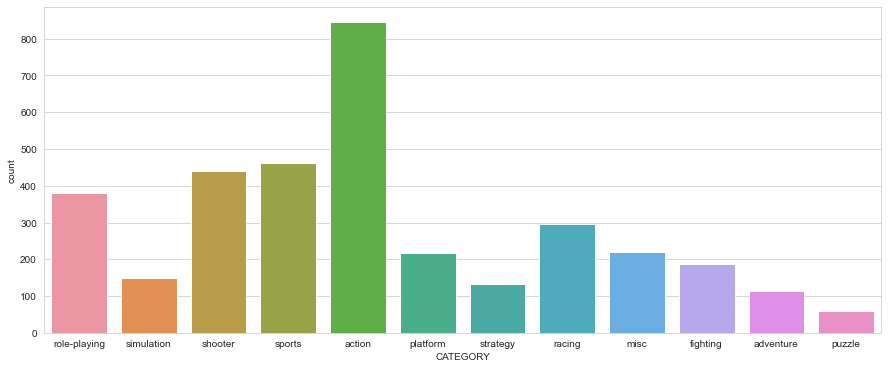

In [10]:
#Most famous category
plt.figure(figsize=(15,6))
sns.countplot(train["CATEGORY"])
#action is most made game

Action category was made the most.

### Which Category has the highest Sales?

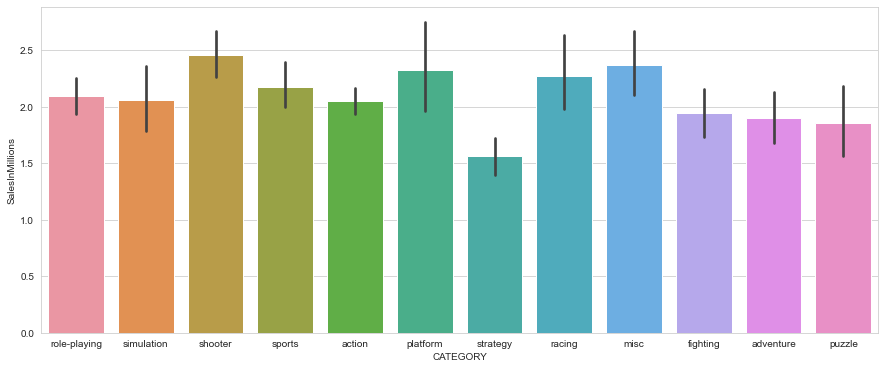

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(x="CATEGORY",y="SalesInMillions",data=train)

The category with the highest sales overall is shooter.

### The Category with the highest Critics Point

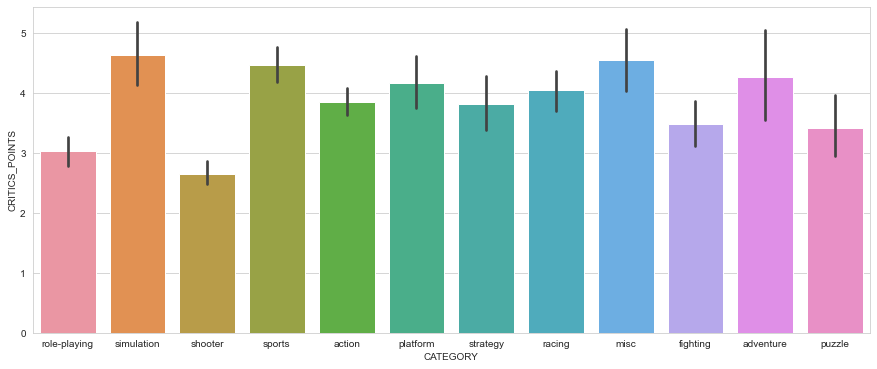

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x="CATEGORY",y="CRITICS_POINTS",data=train)

Simulation category received the highest Critics point on different points whereas shooter category received the lowest critics point

### The Category with the highest User Point

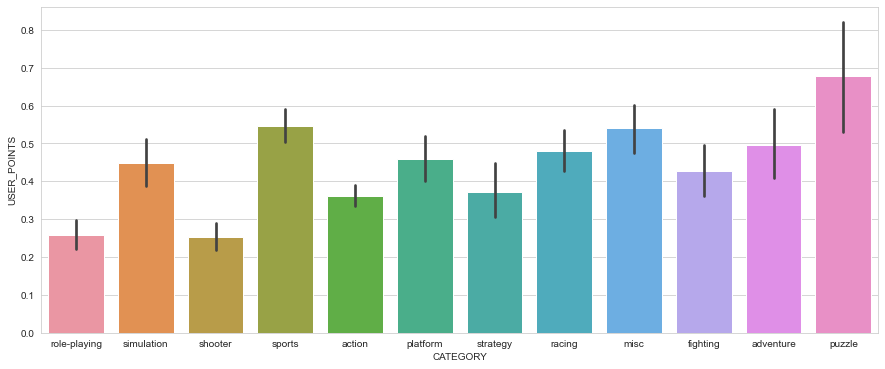

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x="CATEGORY",y="USER_POINTS",data=train)

Among the users,the puzzle category received the highest ratings  whereas shooter received the lowest ratings

From the Sales vs Category plot we saw that the shooter category had them highest sales but from the above plot shooter had the lowest user ratings .This shows that people  bought shooter category but they didn't hava a satisfactory experience.

## Which rating was common among these Categories?

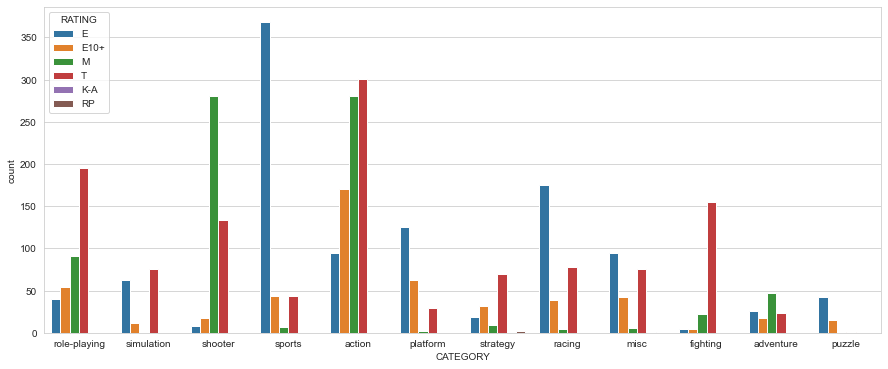

In [30]:
plt.figure(figsize=(15,6))
sns.countplot("CATEGORY",data=train,hue="RATING")

Most common rating among these Catgories are T(13 above) and E(6 above).

In [23]:
train.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

In [24]:
train["PUBLISHER"].value_counts()

Electronic Arts              497
Activision                   289
Ubisoft                      250
Nintendo                     184
Thq                          173
                            ... 
Pinnacle                       1
Aspyr                          1
Swing! Entertainment           1
Rondomedia                     1
Destination Software, Inc      1
Name: PUBLISHER, Length: 204, dtype: int64

## Most popular category in each year?

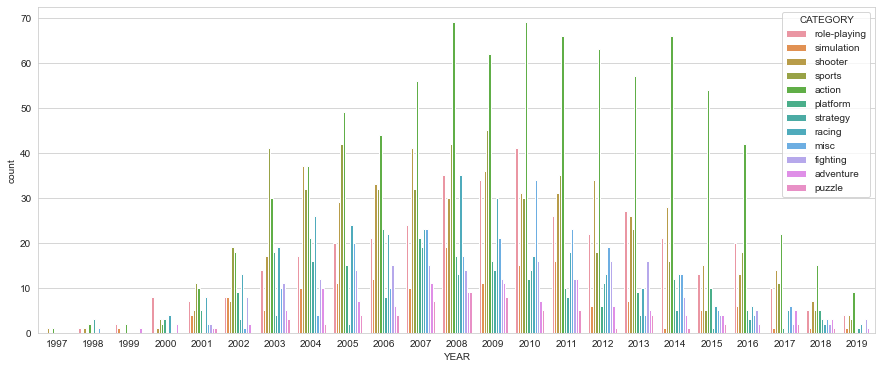

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(train["YEAR"],hue=train["CATEGORY"])

Action based games were quite popular from 2005 but over the past 3-4 year their popularity decreased.
In general the demand for each category decreased in the last 4-5 years.

### Top 15 Publishers 

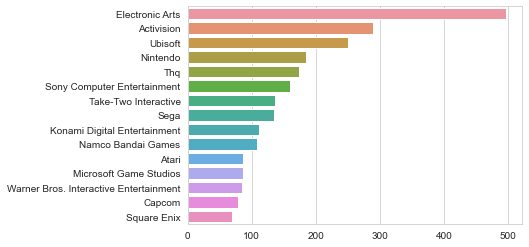

In [45]:
sns.barplot(x=train.PUBLISHER.value_counts().sort_values(ascending=False).head(15).values,y=train.PUBLISHER.value_counts().sort_values(ascending=False).head(15).index)

Electronics Arts is at the top of the list beating every other publisher by a large margin.